<a href="https://colab.research.google.com/github/youngvn/How-to-learn-Machine-Learning/blob/master/Lesson1_Introduction_to_our_first_task_'Dogs_vs_Cats'.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#needed to make install sucessfull 

!pip install fastai==0.7.0
!pip install torchtext==0.2.3

In [0]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:

#PATH is the path to your data
#sz is the size that the images will be resized to in order to ensure that the training runs quickly. 
PATH = "./data/dogscats/"
sz=224


It's important that you have a working NVidia GPU set up. The programming framework used to behind the scenes to work with NVidia GPUs is called CUDA. Therefore, you need to ensure the following line returns True before you proceed. 

In [5]:
torch.cuda.is_available()

True

NVidia provides special accelerated functions for deep learning in a package called CuDNN. Although not strictly necessary, it will improve training performance significantly, and is included by default in all supported fastai configurations. 

In [6]:
torch.backends.cudnn.enabled

True

In [7]:
!wget http://files.fast.ai/data/dogscats.zip
!unzip dogscats.zip
!mv dogscats data
!ls

--2018-12-24 13:53:04--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip.2’

dogscats.zip.2      100%[===================>] 817.50M  78.5MB/s    in 11s     

2018-12-24 13:53:15 (77.5 MB/s) - ‘dogscats.zip.2’ saved [857214334/857214334]

Archive:  dogscats.zip
   creating: dogscats/
   creating: dogscats/sample/
   creating: dogscats/sample/train/
   creating: dogscats/sample/train/cats/
  inflating: dogscats/sample/train/cats/cat.2921.jpg  
  inflating: dogscats/sample/train/cats/cat.394.jpg  
  inflating: dogscats/sample/train/cats/cat.4865.jpg  
  inflating: dogscats/sample/train/cats/cat.3570.jpg  
  inflating: dogscats/sample/train/cats/cat.2266.jpg  
  inflating: dogscats/sample/train/cats/cat.9021.jpg  
  inflating: dogscats/sample/train/cats/c

! tells to use bash (shell) instead of python

In [8]:
!ls

os.listdir(PATH)

data  dogscats	dogscats.zip  dogscats.zip.1  dogscats.zip.2  sample_data


['train', 'test1', 'models', 'valid', 'sample', 'tmp']

os.listdir(PATH)

In [0]:
 os.makedirs('/cache/tmp', exist_ok=True)
 !ln -fs /cache/tmp {PATH}

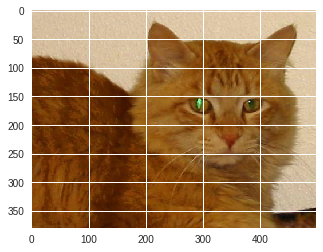

In [10]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [11]:
img.shape

(380, 498, 3)

In [12]:
img[:2,:50]

array([[[209, 186, 155],
        [211, 188, 157],
        [214, 191, 160],
        [215, 192, 161],
        [213, 190, 159],
        [213, 190, 159],
        [214, 191, 160],
        [215, 192, 161],
        [215, 192, 161],
        [208, 185, 154],
        [209, 186, 155],
        [218, 195, 164],
        [221, 198, 167],
        [215, 192, 161],
        [209, 186, 155],
        [210, 187, 156],
        [213, 190, 159],
        [210, 187, 156],
        [206, 183, 152],
        [204, 181, 150],
        [204, 181, 150],
        [208, 185, 154],
        [213, 190, 159],
        [216, 193, 162],
        [217, 194, 163],
        [215, 192, 161],
        [213, 190, 159],
        [214, 191, 160],
        [217, 194, 163],
        [219, 196, 165],
        [216, 193, 162],
        [214, 191, 160],
        [214, 191, 160],
        [216, 193, 162],
        [217, 194, 163],
        [216, 193, 162],
        [213, 190, 159],
        [212, 189, 158],
        [212, 189, 158],
        [213, 190, 159],


In [13]:
from PIL import Image
import numpy
imgArr = numpy.asarray(img[:8,:50])
pilOUT = Image.fromarray(imgArr)

#plt.imshow(pilOUT)
pilOUT

### Our first model: quick start

We're going to use a pre-trained model, that is, a model created by some one else to solve a different problem

We will be using the resnet34 model. resnet34 is a version of the model that won the 2015 ImageNet competition

In [14]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch,
sz))
learn = ConvLearner.pretrained(arch, data, precompute=True) 
learn.fit(0.01, 3)

epoch      trn_loss   val_loss   accuracy   
    0      0.048246   0.030054   0.9885    
    1      0.036952   0.028645   0.991     
    2      0.04082    0.026857   0.991     



[array([0.02686]), 0.991]

### Analyzing results: looking at pictures

In [15]:
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [16]:
data.val_y.shape

(2000,)

In [17]:
data.classes

['cats', 'dogs']

In [0]:
# this gives prediction for validation set. Predictions are in log sca le
log_preds = learn.predict() #log = logarit
preds = np.argmax(log_preds, axis=1) # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1]) # pr(dog) 

In [19]:
log_preds[:10]

array([[ -0.00034,  -7.98149],
       [ -0.00003, -10.26804],
       [ -0.016  ,  -4.14289],
       [ -0.00566,  -5.17779],
       [ -0.00023,  -8.36912],
       [ -0.00003, -10.5031 ],
       [ -0.00003, -10.34578],
       [ -0.00008,  -9.46068],
       [ -0.00454,  -5.39715],
       [ -0.00003, -10.58979]], dtype=float32)

In [20]:
probs.shape

(2000,)

In [0]:
def rand_by_mask(mask): 
  return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)

In [0]:
def rand_by_correct(is_correct): 
  return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    print(idxs)
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

[1319 1877  802  550]
Correctly classified


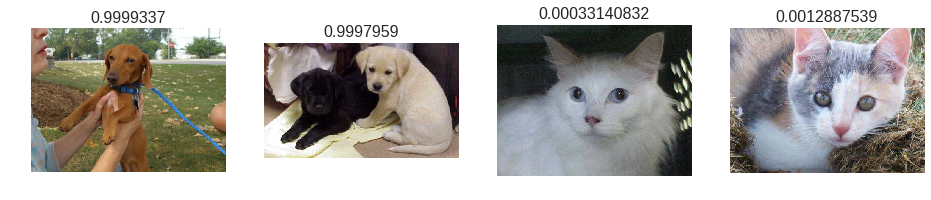

In [25]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

[1733 1604   28 1765]
Correctly classified


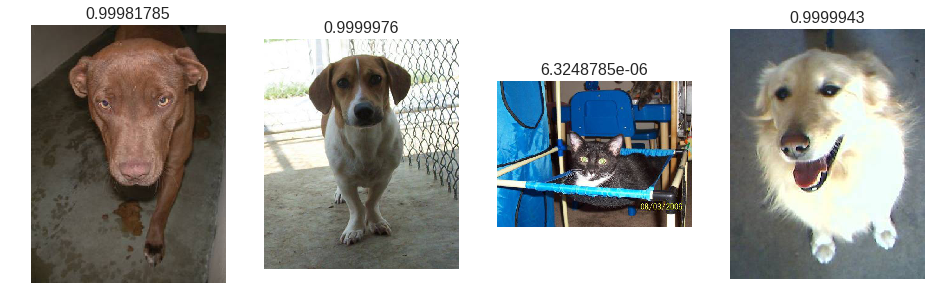

In [26]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]] #tra ve index cua mang can sort

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1  #tai vi no lay cho nen phai nhat -1 de sau khi sort so lon(so be nhat khi am) se len dau
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

[231 181 170 944]
Most correct cats


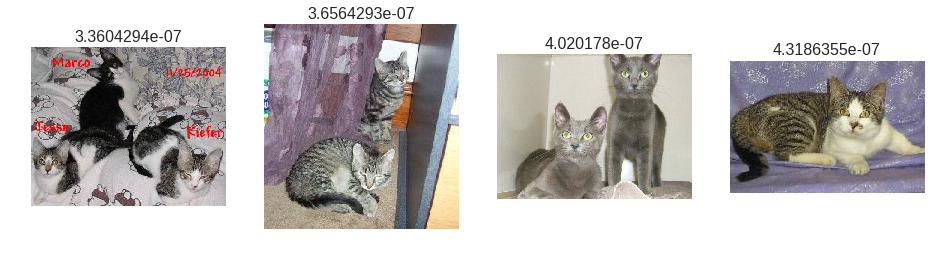

In [31]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

[1270 1023 1204 1891]
Most correct cats


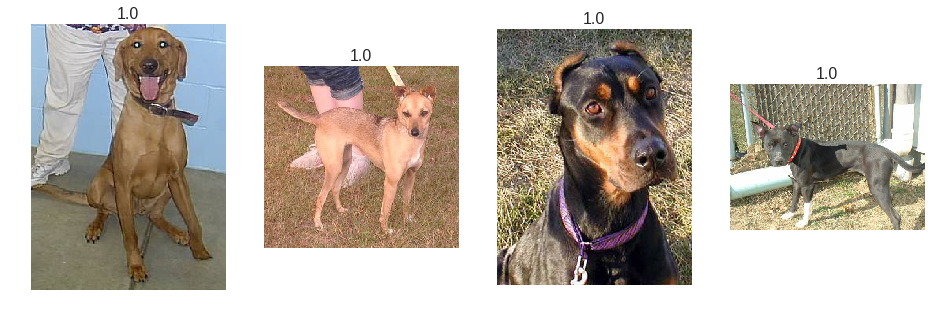

In [32]:
plot_val_with_title(most_by_correct(1, True), "Most correct cats")

1.0 is probability

[783 917 688 397]
Most incorrect cats


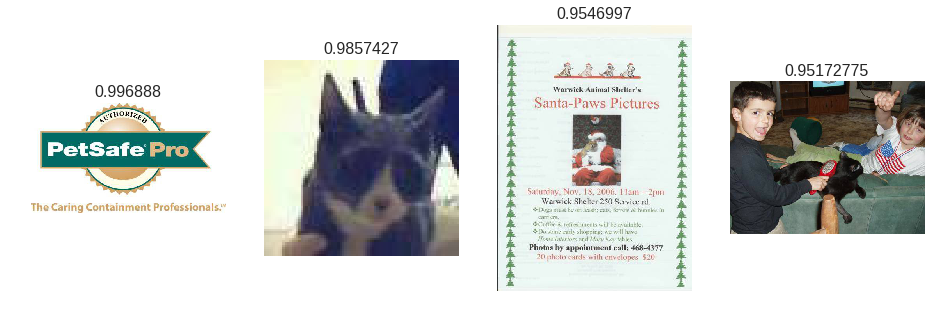

In [33]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

[1498 1484 1823 1208]
Most incorrect dogs


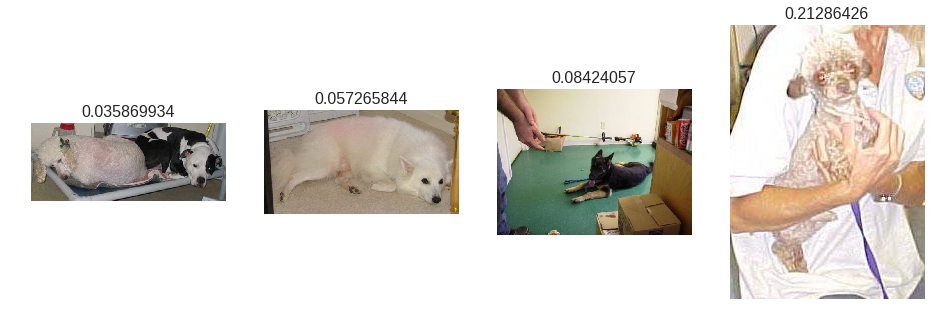

In [34]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

[1676 1820 1575  216]
Most uncertain predictions


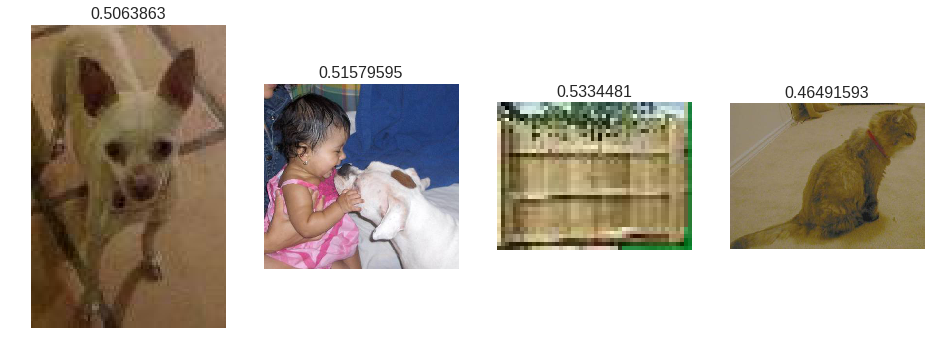

In [35]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

### Choose a learning rate
the learning rate determines how quickly or how slowly you want to update the weights (or parameters).

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [37]:
lrf=learn.lr_find()

 86%|████████▋ | 311/360 [00:08<00:00, 49.93it/s, loss=0.457]


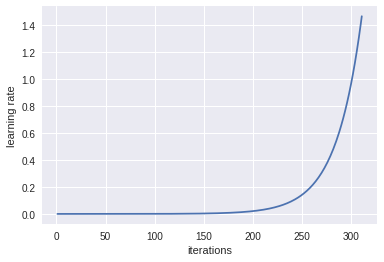

In [38]:
learn.sched.plot_lr()

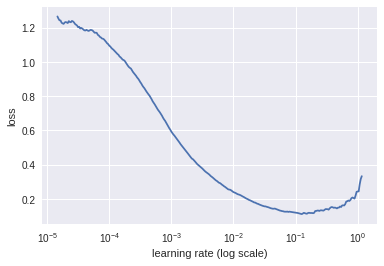

In [39]:
learn.sched.plot()

The loss is still clearly improving at lr=1e-2 (0.01), so that's what we use. Note that the optimal learning rate can change as we train the model, so you may want to re-run this function from time to time.

## Improving our model
#### Data augmentation
This refers to randomly changing the images in ways that shouldn't impact their interpretation, such as horizontal flipping, zooming, and rotating.


In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
    data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
    x,_ = next(iter(data.aug_dl))
    return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

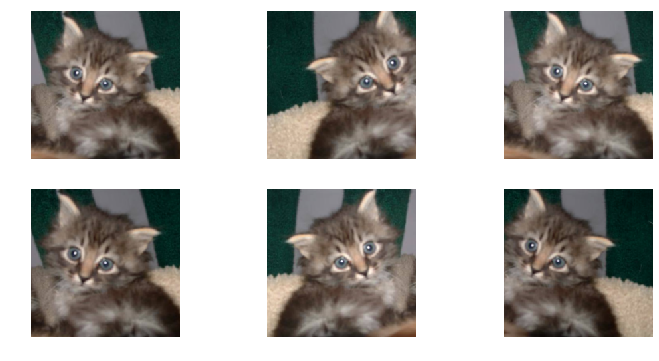

In [43]:
plots(ims, rows=2)

In [44]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.053623   0.029259   0.9885    



[array([0.02926]), 0.9885]

In [0]:
learn.precompute=False

By default when we create a learner, it sets all but the last layer to frozen. That means that it's still only updating the weights in the last layer when we call fit.

To use data augmentation, we have to do learn.precompute=False:

In [46]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.042352   0.027593   0.9895    
    1      0.05443    0.029516   0.989     
    2      0.044144   0.029015   0.988     



[array([0.02902]), 0.988]

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.load('224_lastlayer')

## Fine-tuning and differential learning rate annealing
we have a good final layer trained, we can try fine-tuning the other layers. To tell the learner that we want to unfreeze the remaining layers, just call (surprise surprise!) unfreeze().

In [0]:
learn.unfreeze()

In [50]:
lr=np.array([1e-4,1e-3,1e-2])
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.048962   0.026347   0.9895    
    1      0.046143   0.023298   0.9915    
    2      0.030956   0.020783   0.992     
    3      0.032546   0.023366   0.991     
    4      0.02635    0.020218   0.9925    
    5      0.020963   0.019986   0.9925    
    6      0.022681   0.022105   0.992     



[array([0.0221]), 0.992]

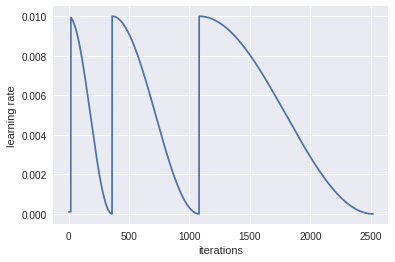

In [52]:
learn.sched.plot_lr()

In [0]:
learn.save('224_all')
learn.load('224_all')

TTA simply makes predictions not just on the images in your validation set, but also makes predictions on a number of randomly augmented versions of them too (by default, it uses the original image along with 4 randomly augmented versions). 

In [51]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)

0.9935

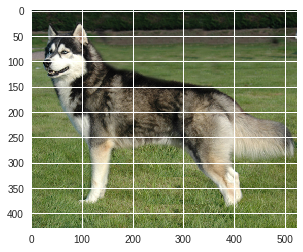

In [57]:
img = plt.imread('husky.jpg')
plt.imshow(img)

In [59]:
trn_tfms, val_tfms = tfms_from_model(arch,sz) # get transformations
im = val_tfms(open_image('husky.jpg'))
learn.precompute=False # We'll pass in a raw image, not activations
preds = learn.predict_array(im[None])
np.argmax(preds) # preds are log probabilities of classes

1

In [62]:
np.exp(preds)

array([[0.0008, 0.9992]], dtype=float32)

In [0]:
image_files = ['cat1.jpeg','cat2.png','cat3.jpeg']

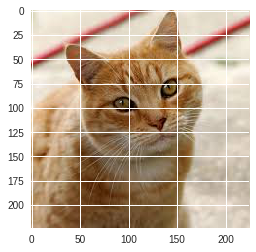

In [65]:
img = plt.imread(image_files[0])
plt.imshow(img)

In [70]:
trn_tfms, val_tfms = tfms_from_model(arch,sz) # get transformations
im = val_tfms(open_image(image_files[0]))
learn.precompute=False # We'll pass in a raw image, not activations
preds = learn.predict_array(im[None])
print(np.argmax(preds)) # preds are log probabilities of classes
print(np.exp(preds))

array([[0.99984, 0.00016]], dtype=float32)

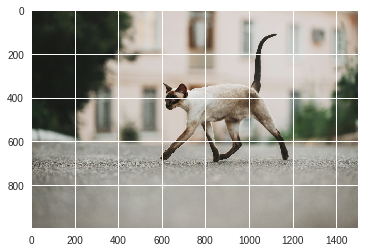

In [66]:
img = plt.imread(image_files[1])
plt.imshow(img)

In [71]:
trn_tfms, val_tfms = tfms_from_model(arch,sz) # get transformations
im = val_tfms(open_image(image_files[1]))
learn.precompute=False # We'll pass in a raw image, not activations
preds = learn.predict_array(im[None])
print(np.argmax(preds)) # preds are log probabilities of classes
print(np.exp(preds))

1
[[0.21449 0.78551]]


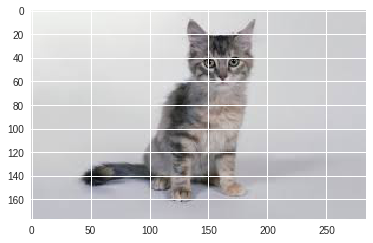

In [67]:
img = plt.imread(image_files[2])
plt.imshow(img)

In [73]:
trn_tfms, val_tfms = tfms_from_model(arch,sz) # get transformations
im = val_tfms(open_image(image_files[2]))
learn.precompute=False # We'll pass in a raw image, not activations
preds = learn.predict_array(im[None])
print(np.argmax(preds)) # preds are log probabilities of classes
print(np.exp(preds))

0
[[1. 0.]]
